In [1]:
import numpy as np
import uproot3 as uproot
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import helper
import skopt
from skopt.plots import plot_objective, plot_evaluations

from scipy.optimize import OptimizeResult

# Helper function to store data

In [8]:

def main():

    filepathMSSI = '/home/amarascs/LZ/HE-NR/Data/LightLoadingSims/MSSI_model_lzCathode_Merged_Reduced.root'
    filepathSS = '/home/amarascs/LZ/HE-NR/Data/LightLoadingSims/Cathode_skim_lowerE_combined_LightRQs.root'

    RQs = ['S1c_phd',
           'S2c_phd',
           'drift_us',
           'x_cm',
           'y_cm',
           'z_cm',
           'cluster_size_cm',
           'log_MPAF',
           'TopBottomAsymmetry']

    trainingRQs = ['cluster_size_cm',
                   'log_MPAF',
                   'TopBottomAsymmetry']

    radialCutValue = 70 # cm. This cut is loose because I don't have many SS events

    dfMSSI = helper.dfFromKeys(filepathMSSI, RQs, 'summary')
    dfSS = helper.dfFromKeys(filepathSS, RQs, 'summary')

    dfMSSI = helper.radialCut(dfMSSI, radialCutValue)
    dfSS = helper.radialCut(dfSS, radialCutValue)

    dfSS['MSSI'] = 0
    dfMSSI['MSSI'] = 1

    df, y_df = helper.prepareDataset(dfSS, dfMSSI, trainingRQs, RQs + ['MSSI'])
    print('Data loaded')

    df.to_pickle('trainingDF.pkl', protocol = 4)
    y_df.to_pickle('labelDF.pkl', protocol = 4)

# Visualizing HPO

In [2]:
%%time
class objective: # ugly hack to load result
    pass

with open('HPO_results.pkl', 'rb') as f:
    HPO_result = pickle.load(f)

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


CPU times: user 324 ms, sys: 41.7 ms, total: 366 ms
Wall time: 413 ms


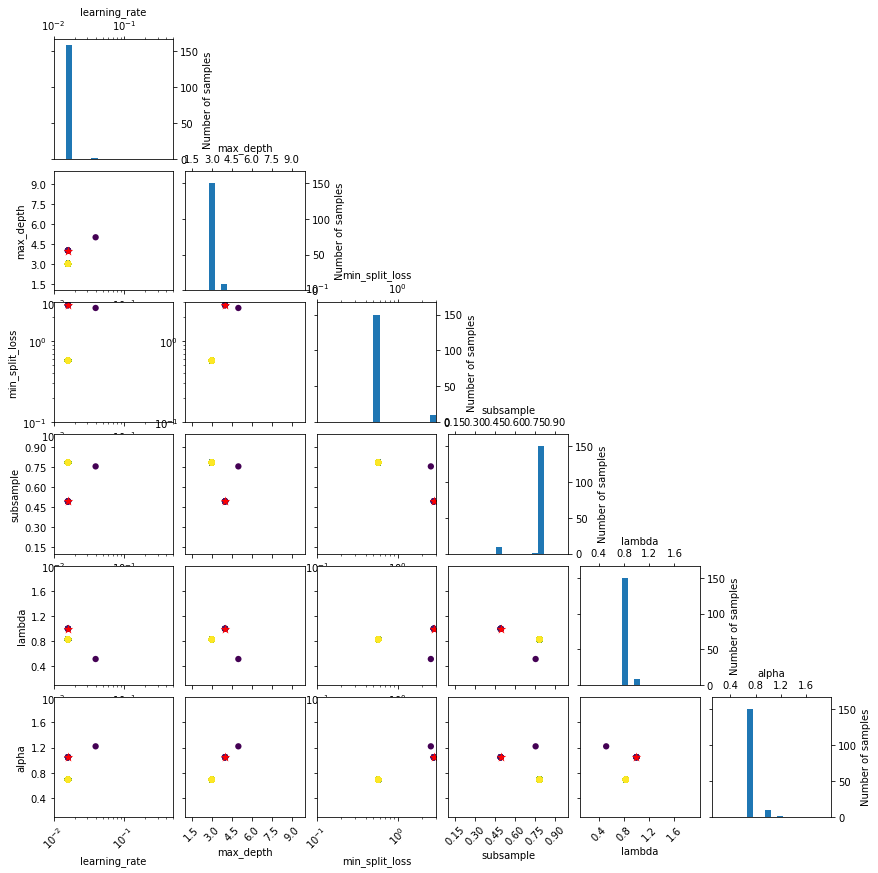

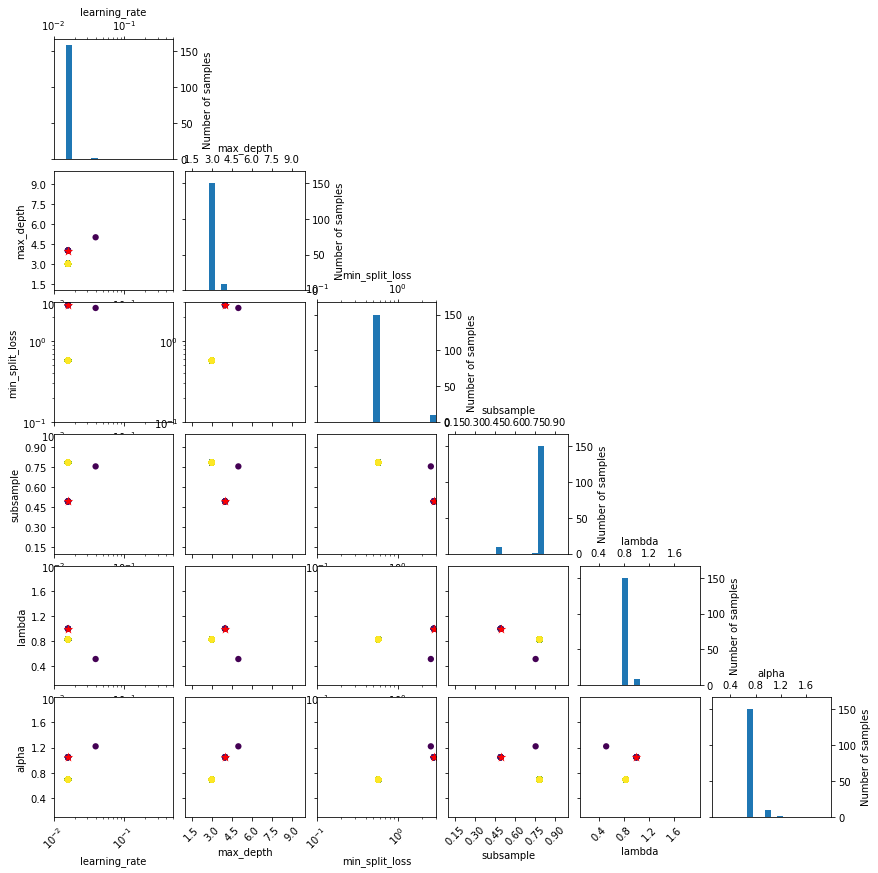

In [5]:
_ = plot_evaluations(HPO_result)
plt.savefig('evalplot.pdf')

_ = plot_evaluations(HPO_result)
plt.savefig('evalplot2.pdf')


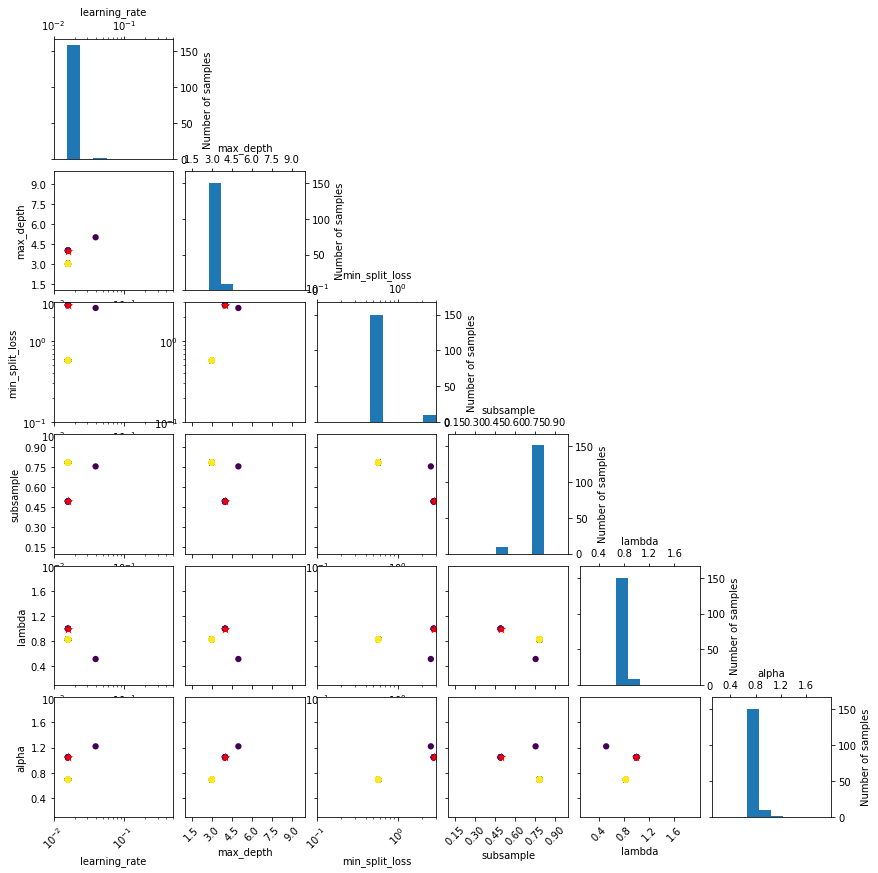

In [35]:
_ = plot_evaluations(HPO_result, bins = 10)

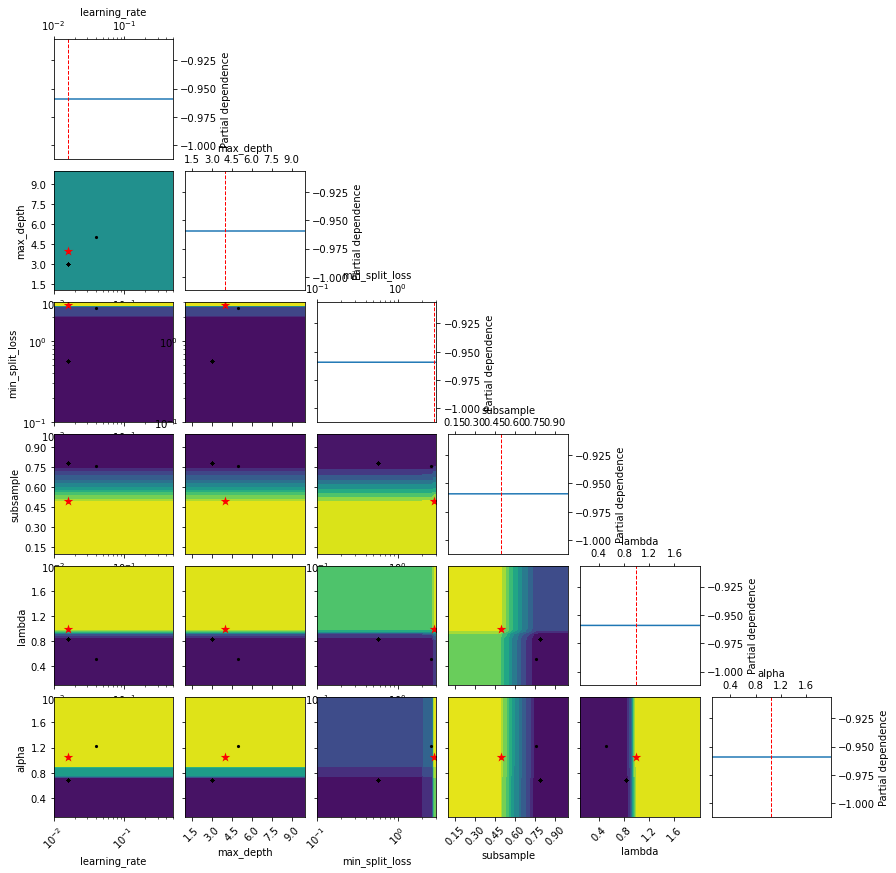

In [37]:
_ = plot_objective(HPO_result, n_points = 60, n_samples = 400)